Digite os meses de referência separados por espaço (ex: JAN FEV MAR):  MAR ABR MAI JUN JUL



🔹 Processando o mês: MAR
Datas no arquivo MAR: 2019-01-01 a 2019-03-31

🔹 Processando o mês: ABR
Datas no arquivo ABR: 2019-01-01 a 2019-04-30

🔹 Processando o mês: MAI
Datas no arquivo MAI: 2019-01-01 a 2019-05-31

🔹 Processando o mês: JUN
Datas no arquivo JUN: 2019-01-01 a 2019-06-30

🔹 Processando o mês: JUL
Datas no arquivo JUL: 2019-01-01 a 2019-07-31
2019-01-01 2019-07-31
2019-07


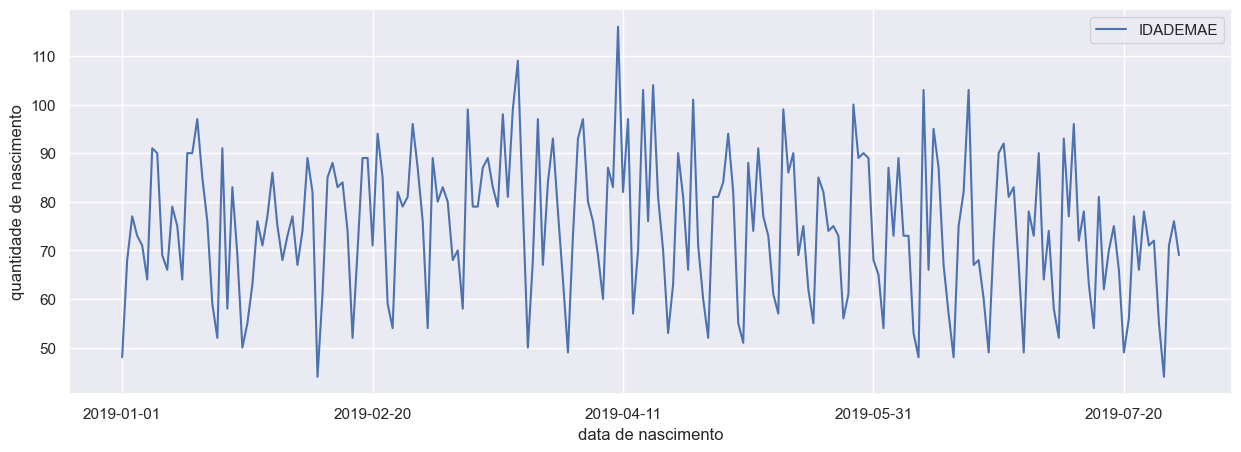

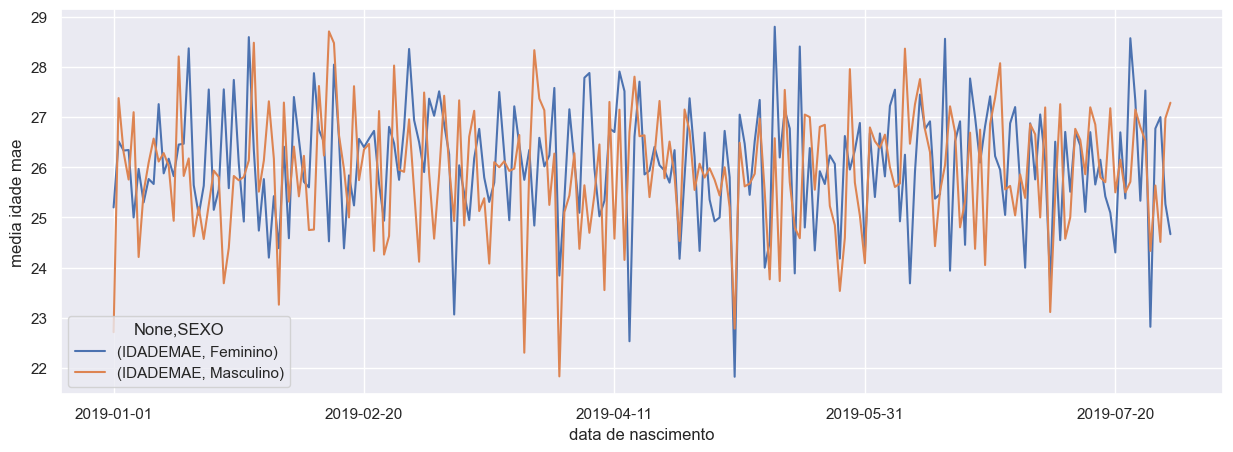

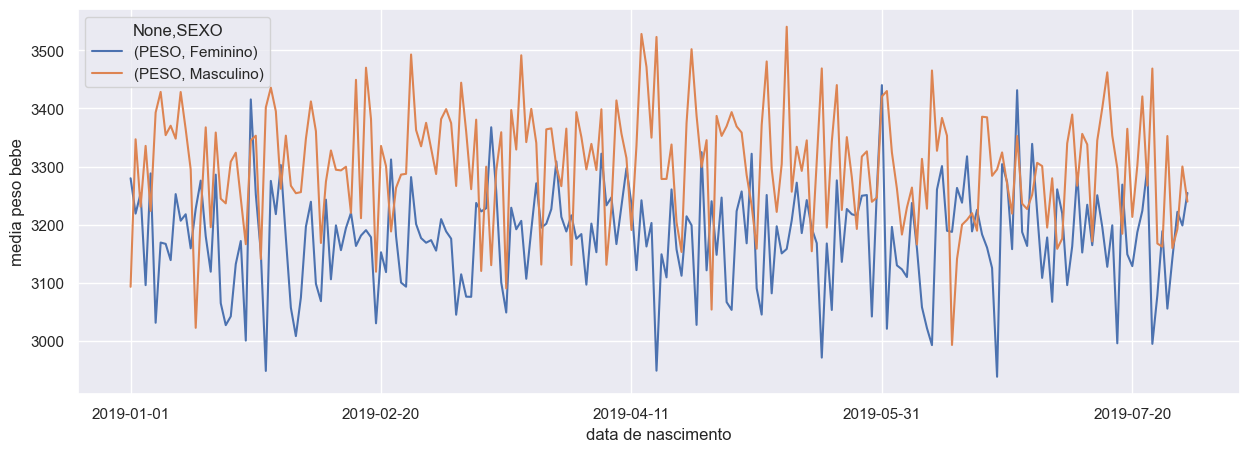

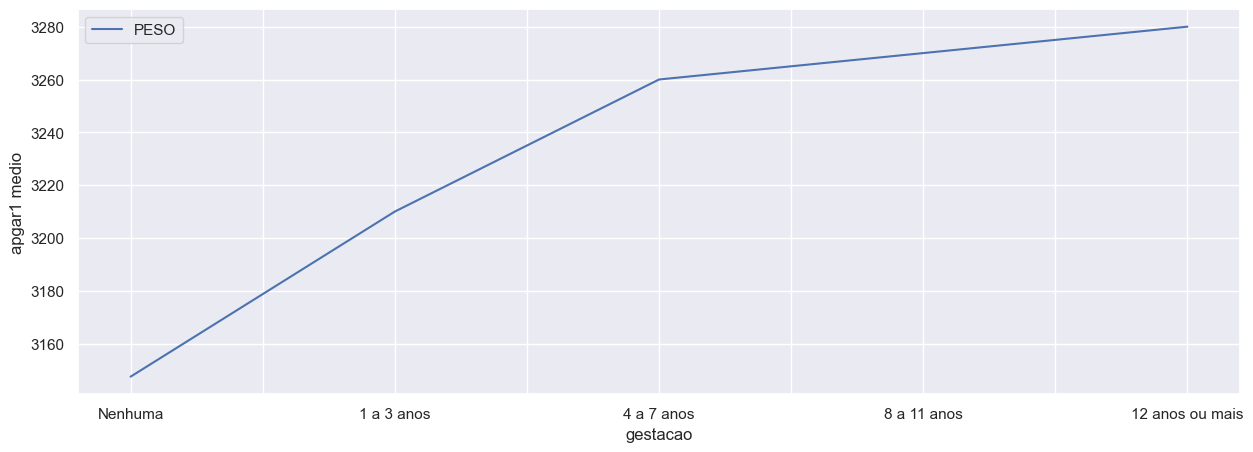

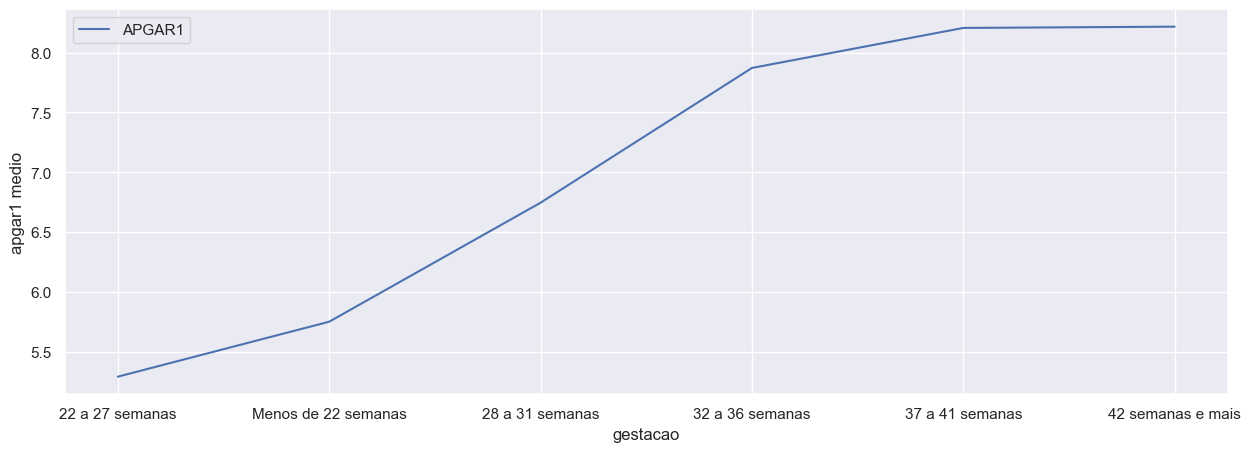

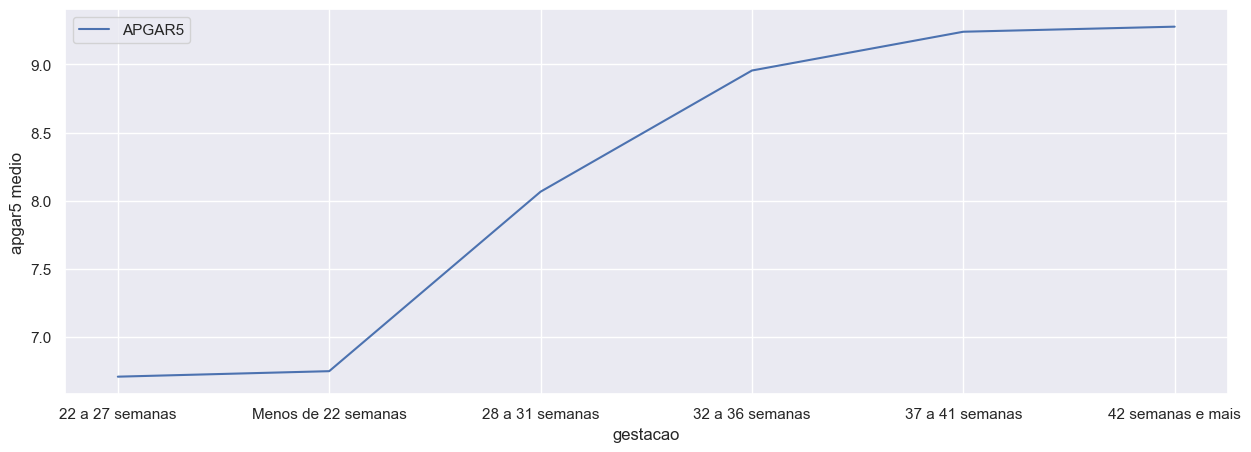

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sns.set_theme()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

meses = input("Digite os meses de referência separados por espaço (ex: JAN FEV MAR): ").split()

for mes in meses:
    print(f'\n🔹 Processando o mês: {mes}')
    
    try:
        sinasc = pd.read_csv(f'SINASC_RO_2019_{mes}.csv')
    except FileNotFoundError:
        print(f'⚠️ Arquivo SINASC_RO_2019_{mes}.csv não encontrado. Pulando para o próximo mês...')
        continue 

    print(f'Datas no arquivo {mes}: {sinasc.DTNASC.min()} a {sinasc.DTNASC.max()}')


print(sinasc.DTNASC.min(), sinasc.DTNASC.max())

max_data = sinasc.DTNASC.max()[:7]
print(max_data)
os.makedirs('./output/figs/'+max_data, exist_ok=True)

plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')
plt.savefig('./output/figs/'+max_data+'/quantidade de nascimento.png')

plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')